In [26]:
pip install gensim

     ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
      --------------------------------------- 0.4/24.0 MB 9.2 MB/s eta 0:00:03
     - -------------------------------------- 0.6/24.0 MB 6.8 MB/s eta 0:00:04
     - -------------------------------------- 1.0/24.0 MB 7.0 MB/s eta 0:00:04
     -- ------------------------------------- 1.4/24.0 MB 7.4 MB/s eta 0:00:04
     -- ------------------------------------- 1.7/24.0 MB 7.3 MB/s eta 0:00:04
     --- ------------------------------------ 1.9/24.0 MB 7.2 MB/s eta 0:00:04
     --- ------------------------------------ 2.4/24.0 MB 7.2 MB/s eta 0:00:04
     ---- ----------------------------------- 2.7/24.0 MB 7.2 MB/s eta 0:00:03
     ----- ---------------------------------- 3.0/24.0 MB 7.1 MB/s eta 0:00:03
     ----- ---------------------------------- 3.3/24.0 MB 7.1 MB/s eta 0:00:03
     ------ --------------------------------- 3.7/24.0 MB 7.3 MB/s eta 0:00:03
     ------ --------------------------------- 4.1/24.0 MB 7

In [27]:
import zipfile
import pandas as ps
import numpy as pn
import seaborn as sns
import matplotlib.pyplot as mt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from gensim.models import Word2Vec

In [2]:
with zipfile.ZipFile(r"C:\Users\Harshit\Downloads\archive (6).zip") as x:
    with x.open(r"IMDB Dataset.csv") as v:
        fd = ps.read_csv(v)
fd.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
fd.shape

(50000, 2)

In [4]:
fd.isnull().sum()/len(fd)*100

review       0.0
sentiment    0.0
dtype: float64

In [5]:
fd.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
# ques - 2

In [7]:
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

In [9]:
# Fit and transform the 'review' column
X_text = vectorizer.fit_transform(fd['review'])

In [10]:
# Create a OneHotEncoder instance for sentiment
encoder = OneHotEncoder(sparse=False)

In [11]:
# Fit and transform the 'sentiment' column
X_sentiment = encoder.fit_transform(fd['sentiment'].values.reshape(-1, 1))

C:\Users\Harshit\anaconda3\envs\tensorflow_new\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
# Combine sparse matrices horizontally
from scipy.sparse import hstack
X_combined = hstack([X_text, X_sentiment])

In [13]:
# Print the vocabulary (optional)
print("Vocabulary:", vectorizer.get_feature_names_out())

Vocabulary: ['00' '000' '00000000000' ... 'żmijewski' 'יגאל' 'כרמון']


In [14]:
# Print the combined vectors (text + sentiment)
print("Combined Vectors:")
print(X_combined.toarray())

Combined Vectors:
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [16]:
# ques -2 

In [17]:
# Prepare the target labels
y = fd['sentiment']

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [19]:
# Create an SVM classifier
classifier = SVC(kernel='linear')

In [20]:
# Train the classifier
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
# Predict the sentiment labels on the test set
y_pred = classifier.predict(X_test)

In [23]:
# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      4961
    positive       1.00      1.00      1.00      5039

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
# ques - 3

In [35]:
from gensim.models import KeyedVectors

# Load the Google News Word2Vec model
model_path = r"C:\Users\Harshit\Downloads\GoogleNews-vectors-negative300.bin\GoogleNews-vectors-negative300.bin"
word2vec_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [38]:
# Function to average vectors for a sentence
def average_vectors(tokens, model):
    vector_sum = pn.zeros(model.vector_size)
    count = 0
    for token in tokens:
        if token in model:
            vector_sum += model[token]
            count += 1
    if count == 0:
        return vector_sum
    return vector_sum / count

In [39]:
# Apply the average_vectors function to each review
fd['review_vector'] = fd['review'].apply(lambda x: average_vectors(x.split(), word2vec_model))

In [43]:
# Prepare the features and target labels
X = pn.stack(fd['review_vector'])
y = fd['sentiment']

In [44]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Create an SVM classifier
classifier = SVC(kernel='linear')

In [46]:
# Train the classifier
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [47]:
# Predict the sentiment labels on the test set
y_pred = classifier.predict(X_test)

In [48]:
# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.84      0.84      4961
    positive       0.84      0.84      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [ ]:
# ques - 4

# there are some insights from the data

In [51]:
# Assuming you have the sentiment analysis model named 'classifier'
# and a DataFrame named 'fd' containing movie reviews and sentiments

# Predict sentiments for the movie reviews
predicted_sentiments = classifier.predict(X)

# Add the predicted sentiments to the DataFrame
fd['predicted_sentiment'] = predicted_sentiments

# Calculate the distribution of predicted sentiments
sentiment_distribution = fd['predicted_sentiment'].value_counts(normalize=True) * 100

# Print sentiment distribution
print("Sentiment Distribution:")
print(sentiment_distribution)

# Explore insights based on predicted sentiments
positive_reviews = fd[fd['predicted_sentiment'] == 'positive']
negative_reviews = fd[fd['predicted_sentiment'] == 'negative']

# Print some example positive reviews
print("\nExample Positive Reviews:")
for review in positive_reviews['review'].sample(5):
    print("-", review)

# Print some example negative reviews
print("\nExample Negative Reviews:")
for review in negative_reviews['review'].sample(5):
    print("-", review)


Sentiment Distribution:
predicted_sentiment
negative    50.142
positive    49.858
Name: proportion, dtype: float64

Example Positive Reviews:
- this show is pretty alright and fun to watch, its a great Disney channel shows and sometimes entertaining.<br /><br />I really enjoyed the first season but i hated the second and third seasons. This show has completely changed around. In the first season it was more about science and animals, all that is gone now in the season and third season. Its more about her life and dating. Ever since that gay kid (Ben) came along, this show has sucked. The writers took a perfectly good kid show and changed it to a crappy teen comedy. Disney took a turn for the worse. I cant stand to watch the newest episodes anymore, they're all garbage.
- I think One True Thing is one of Meryl Streeps finest movies to date. Her depiction of a dying woman is perfect. I have recently lived this movie, and it touched me on more levels than I could have imagined. Meryl is t

In [54]:
from textblob import TextBlob
# Calculate the average sentiment polarity for positive and negative reviews
positive_reviews['polarity'] = positive_reviews['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
negative_reviews['polarity'] = negative_reviews['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Print average sentiment polarity for positive and negative reviews
print("\nAverage Sentiment Polarity:")
print("Positive Reviews:", positive_reviews['polarity'].mean())
print("Negative Reviews:", negative_reviews['polarity'].mean())

# Identify most frequent words in positive and negative reviews
from collections import Counter
positive_words = Counter(" ".join(positive_reviews['review']).split()).most_common(10)
negative_words = Counter(" ".join(negative_reviews['review']).split()).most_common(10)

# Print most frequent words in positive and negative reviews
print("\nMost Frequent Words in Positive Reviews:", positive_words)
print("Most Frequent Words in Negative Reviews:", negative_words)


C:\Users\Harshit\AppData\Local\Temp\ipykernel_28044\1911332978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['polarity'] = positive_reviews['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
C:\Users\Harshit\AppData\Local\Temp\ipykernel_28044\1911332978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['polarity'] = negative_reviews['review'].apply(lambda x: TextBlob(x).sentiment.polarity)



Average Sentiment Polarity:
Positive Reviews: 0.19566919060222557
Negative Reviews: 0.01164793459257352

Most Frequent Words in Positive Reviews: [('the', 290325), ('and', 165317), ('a', 153963), ('of', 149630), ('to', 126679), ('is', 108678), ('in', 91570), ('that', 61446), ('I', 61022), ('it', 51617)]
Most Frequent Words in Negative Reviews: [('the', 278410), ('a', 152997), ('and', 136602), ('to', 135171), ('of', 133995), ('is', 94378), ('in', 78411), ('I', 71476), ('that', 65372), ('this', 62849)]


In [61]:
fd.head()

,review,sentiment,review_vector,predicted_sentiment,review_length,word_count
0,One of the other reviewers has mentioned that ...,positive,"[0.03648266082114362, 0.036577155742239444, 0....",positive,1761,307
1,A wonderful little production. <br /><br />The...,positive,"[0.061530729310702435, 0.041923016573475524, 0...",positive,998,162
2,I thought this was a wonderful way to spend ti...,positive,"[0.037757935562754065, 0.040412685735438894, 0...",positive,926,166
3,Basically there's a family where a little boy ...,negative,"[0.05111663818359375, 0.02627349853515625, 0.0...",negative,748,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[0.04777400451299001, 0.024292443630963386, 0....",positive,1317,230


In [63]:
# Review Length Analysis:

# Calculate review lengths
fd['review_length'] = fd['review'].apply(len)

# Assuming you have already categorized positive and negative reviews
positive_reviews = fd[fd['sentiment'] == 'positive']
negative_reviews = fd[fd['sentiment'] == 'negative']

# Print average review length and word count for positive and negative reviews
print("\nAverage Review Length:")
print("Positive Reviews:", avg_positive_length)
print("Negative Reviews:", avg_negative_length)


Average Review Length:
Positive Reviews: 1324.79768
Negative Reviews: 1294.06436


In [64]:
# Calculate word count for each review
fd['word_count'] = fd['review'].apply(lambda x: len(x.split()))


# Calculate average review length for positive and negative reviews
avg_positive_length = positive_reviews['review_length'].mean()
avg_negative_length = negative_reviews['review_length'].mean()

print("\nAverage Word Count:")
print("Positive Reviews:", avg_positive_word_count)
print("Negative Reviews:", avg_negative_word_count)


Average Word Count:
Positive Reviews: 232.84932
Negative Reviews: 229.46456


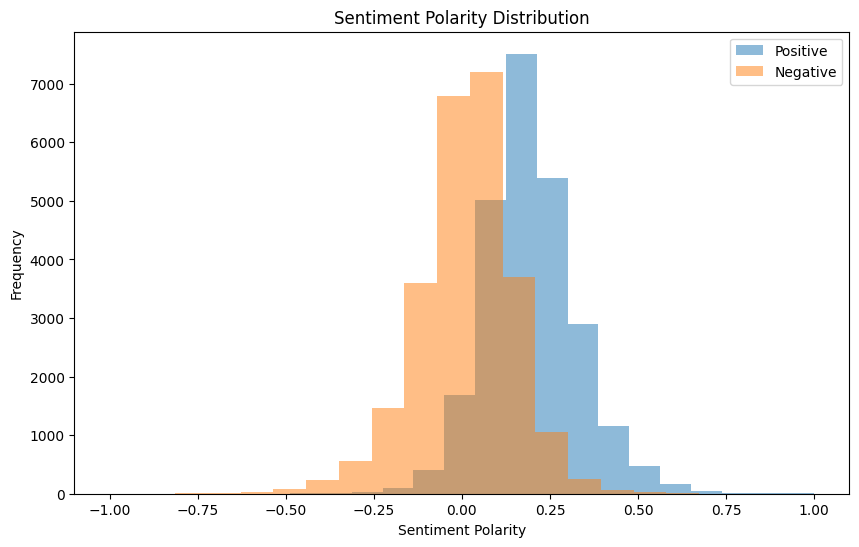

In [57]:
import matplotlib.pyplot as plt

# Plot sentiment polarity distribution
plt.figure(figsize=(10, 6))
plt.hist(positive_reviews['polarity'], bins=20, alpha=0.5, label='Positive')
plt.hist(negative_reviews['polarity'], bins=20, alpha=0.5, label='Negative')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


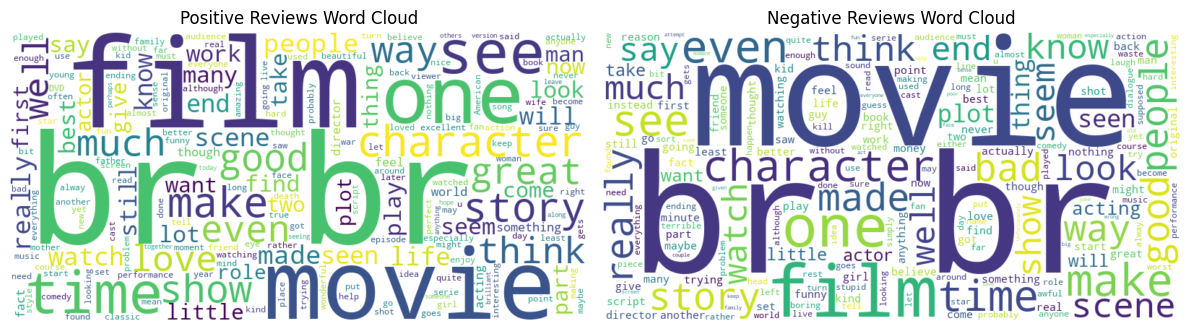

In [67]:
from wordcloud import WordCloud

# Generate word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews['review']))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews['review']))

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()